In [20]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation as FA
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
# matplotlib.use('Qt5Agg')
from sklearn.decomposition import PCA
import seaborn as sns
# %matplotlib notebook
%matplotlib inline

In [38]:
def seperater(arr):
    # global maximum
    pre_data = arr
    amp = np.abs(pre_data)
    # amp = amp / maximum
    phs = np.angle(pre_data)
    phs = (phs - (- pi)) / (pi - (- pi))
    sin = np.sin(phs)
    sin = (sin + 1) / 2
    seperated_data = np.stack((amp,phs), axis=0)
    # seperated_data = np.expand_dims(seperated_data, axis=0)
    return seperated_data

In [39]:
asphalt = np.load('./road_data/asphalt/alsphalt.npy')
asphalt = seperater(asphalt)
bicycle = np.load('./road_data/bicycle/bicycle.npy')
bicycle = seperater(bicycle)
bicycle2 = np.load('./road_data/bicycle/bicycle2.npy')
bicycle2 = seperater(bicycle2)
block = np.load('./road_data/block/block.npy')
block = seperater(block)
block2 = np.load('./road_data/block/block2.npy')
block2 = seperater(block2)
floor = np.load('./road_data/floor/floor.npy')
floor = seperater(floor)
ground = np.load('./road_data/ground/ground1.npy')
ground = seperater(ground)
# ground = np.load('./road_data/ground/ground1.npy')
# asphalt = np.load('./road_data/asphalt/alsphalt.npy')
# asphalt = np.abs(asphalt)

# # asphalt = seperater(asphalt)
# bicycle = np.load('./road_data/bicycle/bicycle.npy')
# bicycle = np.abs(bicycle)
# # bicycle = seperater(bicycle)
# bicycle2 = np.load('./road_data/bicycle/bicycle2.npy')
# bicycle2 = np.abs(bicycle)
# # bicycle2 = seperater(bicycle2)
# block = np.load('./road_data/block/block.npy')
# block = np.abs(block)
# # block = seperater(block)
# block2 = np.load('./road_data/block/block2.npy')
# block2 = np.abs(block2)
# # block2 = seperater(block2)
# floor = np.load('./road_data/floor/floor.npy')
# floor = np.abs(floor)
# # floor = seperater(floor)
# ground = np.load('./road_data/ground/ground1.npy')
# ground = np.abs(ground)
# # ground = seperater(ground)

In [42]:
print(asphalt.shape)

(2, 300, 414)


In [45]:
X = np.concatenate((asphalt[0], bicycle[0], block[0], floor[0], ground[0]), axis=0)
X_phs = np.concatenate((asphalt[1], bicycle[1], block[1], floor[1], ground[1]), axis = 0)
# X = np.concatenate((asphalt, bicycle, block, floor, ground), axis=0)

In [44]:
X.shape

(1500, 414)

In [19]:
print(np.max(X))

414.0


In [6]:
from sklearn.preprocessing import normalize
data = normalize(X)

In [7]:
print(np.max(data))

0.11858371853750546


In [8]:
print(X.shape)

(1500, 414)


In [9]:
data_dict = {
    'asphalt' : asphalt,
    'bicycle' : bicycle,
    'block' : block,
    'floor' : floor,
    'ground' : ground,
}

In [10]:
ground.shape

(2, 300, 414)

In [11]:
print(np.max(asphalt[1]))

3.141592653589793


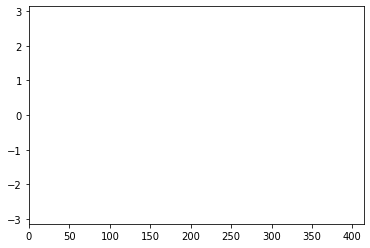

In [8]:
x, y = [], []
x = np.linspace(0,len(asphalt), len(asphalt))
fig = plt.figure()
ax = plt.axes(xlim = (0, asphalt.shape[1]), ylim = (-pi, pi))
# ax = plt.axes(xlim=(0,asphalt.shape[2]), ylim = (0,np.max(asphalt[0]))) # amp
line, = plt.plot([], [])

In [9]:
asphalt.shape

(300, 414)

In [10]:
xs = np.linspace(0,asphalt.shape[1],asphalt.shape[1])
ys = np.linspace(0,asphalt.shape[0],asphalt.shape[0])
X, Y = np.meshgrid(xs, ys)

In [14]:
def plot_3d(arr, title):
    x = np.arange(arr.shape[1])
    y = np.arange(arr.shape[0])
    print(y.shape, x.shape)
    x_m, y_m = np.meshgrid(x,y)
    plt.figure(figsize=(20,30))
    axes = plt.axes(projection='3d')
    axes.plot_surface(x_m, y_m, arr)
    plt.title(title)
    plt.show()

In [15]:
asphalt[:,:100].shape

(300, 100)

In [ ]:
plot_3d(asphalt[:, :100], 'asphalt')
plot_3d(bicycle[:, :100], 'bibycle')
plot_3d(block[:, :100], 'block')
plot_3d(floor[:, :100], 'floor')
plot_3d(ground[:, :100], 'ground')

In [63]:
def heatmap(arr):
    ax = sns.heatmap(arr, vmin = 0, vmax = 414)
def heatmap_phs(arr):
    ax = sns.heatmap(arr, vmin = -1, vmax = 1)

In [56]:
print(asphalt[0].shape)

(300, 414)


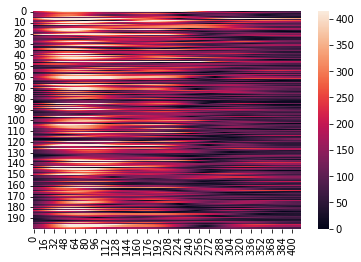

In [57]:
heatmap(asphalt[0, :200,:])

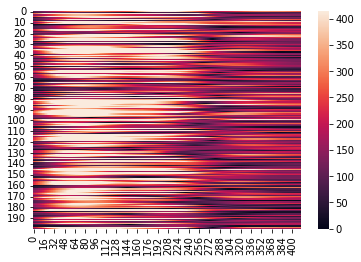

In [58]:
heatmap(bicycle[0, :200,:])

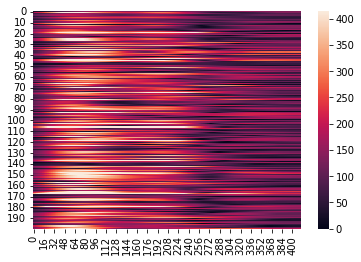

In [59]:
heatmap(block[0, :200,:])

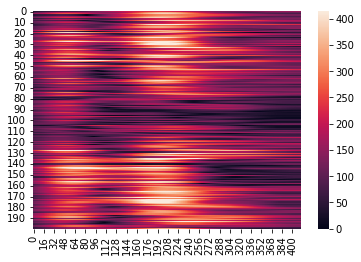

In [60]:
heatmap(floor[0, :200,:])

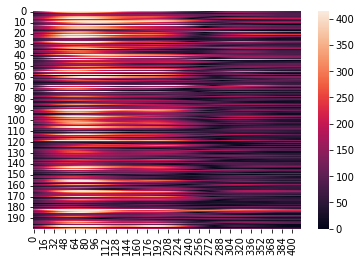

In [61]:
heatmap(ground[0, :200,:])

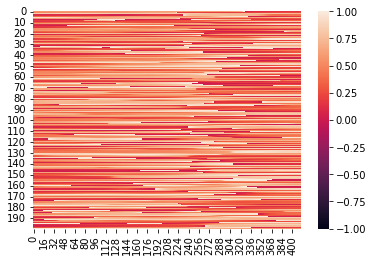

In [64]:
heatmap_phs(asphalt[1, :200, :])

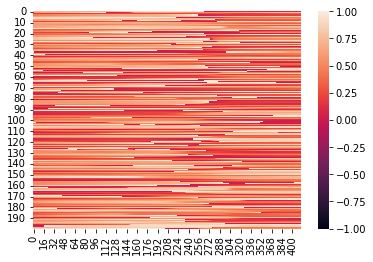

In [66]:
heatmap_phs(bicycle[1, :200, :])

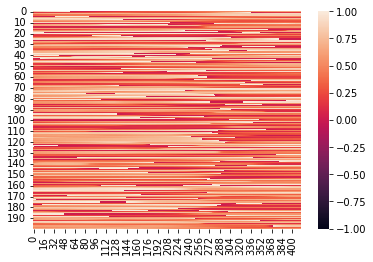

In [67]:
heatmap_phs(block[1, :200, :])

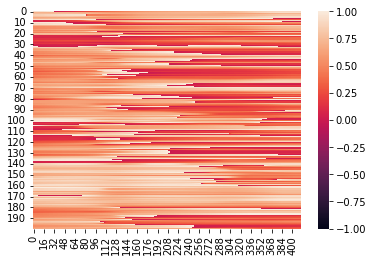

In [68]:
heatmap_phs(floor[1, :200, :])

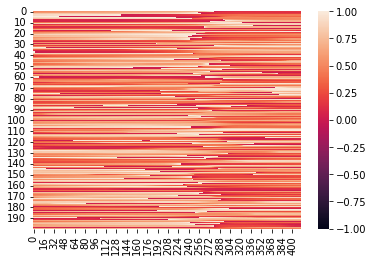

In [69]:
heatmap_phs(ground[1, :200, :])